## Importing modules and input file

In [1]:
import pandas as pd
import numpy as np
import imblearn
from imblearn import over_sampling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


Bad key savefig.frameon in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an updated matp

In [2]:
insurance = pd.read_csv('Cleaned_insurance_data.csv')

In [3]:
insurance.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,M,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,Yes
1,1,2,M,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,No
2,2,3,M,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,Yes
3,3,4,M,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,No
4,4,5,F,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,No


In [4]:
#the index field has got exported twice in the previous step. needs to be dropped.

insurance.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [5]:
insurance.drop(['Unnamed: 0'], axis =1, inplace =True)

In [6]:
insurance.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

It is time to assess the appropriate binning for columns like Age, Annual_Premium,Region code, channel and Vintage

## Binning of distributed values

In [7]:
print('Minimum age:', insurance.Age.min())
print('Maximum age:', insurance.Age.max())

Minimum age: 20
Maximum age: 85


Age can be divided into 20s, 30s, 40s, 50s, 60s and above 70.
as there are fewer customers who have crossed 70 as per the EDA.

In [8]:
def age_bin(x):
    if x['Age'] <30:
        Age_segment = '20s'
    elif x['Age'] <40:
        Age_segment = '30s'
    elif x['Age'] <50:
        Age_segment = '40s'
    elif x['Age'] <60:
        Age_segment = '50s'   
    elif x['Age'] <70:
        Age_segment = '60s'
    else:
        Age_segment = '70plus'
    return Age_segment

insurance['Age_Segment'] = insurance.apply(lambda x: age_bin(x), axis=1)

In [9]:
insurance['Age_Segment'].value_counts()

20s       154941
40s        76696
30s        54160
50s        47906
60s        28946
70plus     17682
Name: Age_Segment, dtype: int64

A similar binning needs to be applied for annual premium also. 
As per the EDA, we saw that the number of premiums above 70k saw a decline.
Hence we are keeping the premiums over 70k as a single group.

In [10]:
insurance[['Age','Age_Segment']].head(10)

,Age,Age_Segment
0,44,40s
1,76,70plus
2,47,40s
3,21,20s
4,29,20s
5,24,20s
6,23,20s
7,56,50s
8,24,20s
9,32,30s


In [11]:
insurance['Age_Segment'].dtype

dtype('O')

In [12]:
print('Minimum premium:', insurance.Annual_Premium.min())
print('Maximum premium:', insurance.Annual_Premium.max())

Minimum premium: 2630.0
Maximum premium: 99999.0


In [13]:
def premium_bin(x):
    if x['Annual_Premium'] <10000:
        Premium_segment = '0-10k'
    elif x['Annual_Premium'] <20000:
        Premium_segment = '10-20k'
    elif x['Annual_Premium'] <30000:
        Premium_segment = '20-30k'
    elif x['Annual_Premium'] <40000:
        Premium_segment = '30-40k'   
    elif x['Annual_Premium'] <50000:
        Premium_segment = '40-50k'
    elif x['Annual_Premium'] <60000:
        Premium_segment = '50-60k'
    elif x['Annual_Premium'] <70000:
        Premium_segment = '60-70k'
    else:
        Premium_segment = '70plus'
    return Premium_segment

insurance['Premium_Segment'] = insurance.apply(lambda x: premium_bin(x), axis=1)

In [14]:
insurance['Premium_Segment'].value_counts()

30-40k    125047
20-30k     95381
0-10k      64882
40-50k     57788
50-60k     20049
60-70k      7271
10-20k      5802
70plus      4111
Name: Premium_Segment, dtype: int64

In [15]:
insurance['Premium_Segment'].dtype

dtype('O')

In [16]:
insurance[['Premium_Segment','Annual_Premium']].head(10)

,Premium_Segment,Annual_Premium
0,40-50k,40454.0
1,30-40k,33536.0
2,30-40k,38294.0
3,20-30k,28619.0
4,20-30k,27496.0
5,0-10k,2630.0
6,20-30k,23367.0
7,30-40k,32031.0
8,20-30k,27619.0
9,20-30k,28771.0


The number of days customers have been on books can also be a key indicator in determining how likely they are to buy a new insurance.

The field Vintage represents this number. However, the number of days seems to be widely distributed and it will be convenient to have bins as months to indicate the Months on books.

In [17]:
insurance['Vintage'].describe()

count    380331.000000
mean        154.344056
std          83.668499
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [18]:
insurance['Months_On_Books'] = (round(insurance['Vintage']/30,0)).astype(str) + ' months'

In [19]:
insurance[['Months_On_Books', 'Vintage']].head(10)

,Months_On_Books,Vintage
0,7.0 months,217
1,6.0 months,183
2,1.0 months,27
3,7.0 months,203
4,1.0 months,39
5,6.0 months,176
6,8.0 months,249
7,2.0 months,72
8,1.0 months,28
9,3.0 months,80


In [20]:
insurance['Months_On_Books'].dtype

dtype('O')

In [21]:
insurance['Months_On_Books'].value_counts()

4.0 months     40888
8.0 months     40830
2.0 months     40664
6.0 months     40561
1.0 months     38238
3.0 months     38160
5.0 months     38002
9.0 months     37930
7.0 months     37815
10.0 months    19465
0.0 months      7778
Name: Months_On_Books, dtype: int64

The distribution seems to be spread out evenly across all months on books.
However 0 months is doesn't seem to be a meaningful criteria.
It can be included as a part of 1 month bin.

In [22]:
insurance['Months_On_Books'][insurance['Months_On_Books']=='0.0 months']= '1.0 months'

C:\Users\B.K.M.Bhat\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
insurance['Months_On_Books'].value_counts()

1.0 months     46016
4.0 months     40888
8.0 months     40830
2.0 months     40664
6.0 months     40561
3.0 months     38160
5.0 months     38002
9.0 months     37930
7.0 months     37815
10.0 months    19465
Name: Months_On_Books, dtype: int64

The customers are contacted through various channels. 
From EDA it was seen that channels 152, 26, 124, 160 and 156 were commonly used. These can be mapped to their actual channels.
The remianing will be categorized under Others.

In [24]:
def policy(x):
    if x['Policy_Sales_Channel'] == 152:
        channel = 'Internet'
    elif x['Policy_Sales_Channel'] == 26:
        channel = 'Direct Response'
    elif x['Policy_Sales_Channel'] == 124.0:
        channel = 'Independent Agencies'
    elif x['Policy_Sales_Channel'] == 160.0:
        channel = 'Affinity Group'
    elif x['Policy_Sales_Channel'] == 156.0:
        channel = 'Exclusive/Captive Agents'
    else:
        channel = 'others'
    return channel


In [25]:
insurance['Policy_Sales_Channel']

0          26.0
1          26.0
2          26.0
3         152.0
4         152.0
          ...  
380326     26.0
380327    152.0
380328    160.0
380329    124.0
380330     26.0
Name: Policy_Sales_Channel, Length: 380331, dtype: float64

In [26]:
insurance['Policy_channel_type'] = insurance.apply((lambda x : policy(x)) , axis=1)

In [27]:
insurance['Policy_channel_type'].value_counts()

Internet                    134545
Direct Response              79476
Independent Agencies         73835
others                       60068
Affinity Group               21754
Exclusive/Captive Agents     10653
Name: Policy_channel_type, dtype: int64

The Channel codes have been designated to their appropriate Channels. It's time to move on to the regions. As per the EDA, 28,8,46, 41 and 15 are the regions with maximum customers. Their actualy names can be assigned and the remaining categorized as others.  

In [28]:
insurance['Region_Code'].value_counts()

28.0    105928
8.0      33776
46.0     19744
41.0     18211
15.0     13299
30.0     12191
29.0     11048
50.0     10234
3.0       9242
11.0      9225
36.0      8790
33.0      7654
47.0      7434
35.0      6935
6.0       6279
45.0      5603
37.0      5491
18.0      5148
48.0      4681
14.0      4677
39.0      4635
10.0      4374
21.0      4265
2.0       4038
13.0      4034
7.0       3270
12.0      3198
9.0       3100
27.0      2822
32.0      2787
43.0      2637
17.0      2611
26.0      2587
25.0      2502
24.0      2414
38.0      2025
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1829
4.0       1801
34.0      1664
19.0      1535
22.0      1307
40.0      1295
5.0       1278
1.0       1008
44.0       808
42.0       591
52.0       265
51.0       178
Name: Region_Code, dtype: int64

In [29]:
def region(x):
    if x['Region_Code'] == 28.0:
        region = 'West Bengal'
    elif x['Region_Code'] == 8.0:
        region = 'Haryana'
    elif x['Region_Code'] == 46.0:
        region = 'Goa'
    elif x['Region_Code'] == 41.0:
        region = 'Andhra Pradesh'
    elif x['Region_Code'] == 15.0:
        region = 'Maharashtra'
    else:
        region = 'Others'
    return region

In [30]:
insurance['Region_name'] = insurance.apply((lambda x: region(x)), axis =1)

In [31]:
insurance['Region_name'].value_counts()

Others            189373
West Bengal       105928
Haryana            33776
Goa                19744
Andhra Pradesh     18211
Maharashtra        13299
Name: Region_name, dtype: int64

In [32]:
insurance[['Region_Code', 'Region_name']].head(10)

,Region_Code,Region_name
0,28.0,West Bengal
1,3.0,Others
2,28.0,West Bengal
3,11.0,Others
4,41.0,Andhra Pradesh
5,33.0,Others
6,11.0,Others
7,28.0,West Bengal
8,3.0,Others
9,6.0,Others


The required fields will be retained and the remaining dropped as they aren't required for model building

In [33]:
insurance_fields_dropped = insurance.drop(['Region_Code', 'Policy_Sales_Channel','Vintage', 'Age', 'Annual_Premium'], axis=1)

In [34]:
insurance_fields_dropped.head(10)

,id,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Age_Segment,Premium_Segment,Months_On_Books,Policy_channel_type,Region_name
0,1,M,1,0,> 2 Years,Yes,Yes,40s,40-50k,7.0 months,Direct Response,West Bengal
1,2,M,1,0,1-2 Year,No,No,70plus,30-40k,6.0 months,Direct Response,Others
2,3,M,1,0,> 2 Years,Yes,Yes,40s,30-40k,1.0 months,Direct Response,West Bengal
3,4,M,1,1,< 1 Year,No,No,20s,20-30k,7.0 months,Internet,Others
4,5,F,1,1,< 1 Year,No,No,20s,20-30k,1.0 months,Internet,Andhra Pradesh
5,6,F,1,0,< 1 Year,Yes,No,20s,0-10k,6.0 months,Affinity Group,Others
6,7,M,1,0,< 1 Year,Yes,No,20s,20-30k,8.0 months,Internet,Others
7,8,F,1,0,1-2 Year,Yes,Yes,50s,30-40k,2.0 months,Direct Response,West Bengal
8,9,F,1,1,< 1 Year,No,No,20s,20-30k,1.0 months,Internet,Others
9,10,F,1,1,< 1 Year,No,No,30s,20-30k,3.0 months,Internet,Others


The fields Response and Vehicle damage can be converted into Boolean 0s and 1s.

In [35]:
Bool = {'Yes':1, 'No':0}

In [36]:
insurance_fields_dropped.replace(Bool,inplace=True)

In [37]:
insurance_fields_dropped.head(10)

,id,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Response,Age_Segment,Premium_Segment,Months_On_Books,Policy_channel_type,Region_name
0,1,M,1,0,> 2 Years,1,1,40s,40-50k,7.0 months,Direct Response,West Bengal
1,2,M,1,0,1-2 Year,0,0,70plus,30-40k,6.0 months,Direct Response,Others
2,3,M,1,0,> 2 Years,1,1,40s,30-40k,1.0 months,Direct Response,West Bengal
3,4,M,1,1,< 1 Year,0,0,20s,20-30k,7.0 months,Internet,Others
4,5,F,1,1,< 1 Year,0,0,20s,20-30k,1.0 months,Internet,Andhra Pradesh
5,6,F,1,0,< 1 Year,1,0,20s,0-10k,6.0 months,Affinity Group,Others
6,7,M,1,0,< 1 Year,1,0,20s,20-30k,8.0 months,Internet,Others
7,8,F,1,0,1-2 Year,1,1,50s,30-40k,2.0 months,Direct Response,West Bengal
8,9,F,1,1,< 1 Year,0,0,20s,20-30k,1.0 months,Internet,Others
9,10,F,1,1,< 1 Year,0,0,30s,20-30k,3.0 months,Internet,Others


The categorical variables now need to be encoded.

## One hot encoding

In [38]:
Vehicle_Age = pd.get_dummies(insurance_fields_dropped['Vehicle_Age'], prefix = 'Vehicle_Age')

In [39]:
Vehicle_Age.head()

,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0


In [40]:
Age_Segment = pd.get_dummies(insurance_fields_dropped['Age_Segment'], prefix = 'Age_Segment')
Premium_Segment = pd.get_dummies(insurance_fields_dropped['Premium_Segment'], prefix = 'Premium_Segment')
Months_On_Books = pd.get_dummies(insurance_fields_dropped['Months_On_Books'], prefix = 'Months_On_Books')
Policy_channel_type = pd.get_dummies(insurance_fields_dropped['Policy_channel_type'], prefix = 'Policy_channel_type')
Region_name = pd.get_dummies(insurance_fields_dropped['Region_name'], prefix = 'Region')
Gender = pd.get_dummies(insurance_fields_dropped['Gender'], prefix = 'Gender')

In [41]:
Age_Segment.head(10)

,Age_Segment_20s,Age_Segment_30s,Age_Segment_40s,Age_Segment_50s,Age_Segment_60s,Age_Segment_70plus
0,0,0,1,0,0,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0
7,0,0,0,1,0,0
8,1,0,0,0,0,0
9,0,1,0,0,0,0


In [42]:
Premium_Segment.head(10)

,Premium_Segment_0-10k,Premium_Segment_10-20k,Premium_Segment_20-30k,Premium_Segment_30-40k,Premium_Segment_40-50k,Premium_Segment_50-60k,Premium_Segment_60-70k,Premium_Segment_70plus
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0
7,0,0,0,1,0,0,0,0
8,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,0


In [43]:
Months_On_Books.head()

,Months_On_Books_1.0 months,Months_On_Books_10.0 months,Months_On_Books_2.0 months,Months_On_Books_3.0 months,Months_On_Books_4.0 months,Months_On_Books_5.0 months,Months_On_Books_6.0 months,Months_On_Books_7.0 months,Months_On_Books_8.0 months,Months_On_Books_9.0 months
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0


In [44]:
Policy_channel_type.head()

,Policy_channel_type_Affinity Group,Policy_channel_type_Direct Response,Policy_channel_type_Exclusive/Captive Agents,Policy_channel_type_Independent Agencies,Policy_channel_type_Internet,Policy_channel_type_others
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [45]:
Region_name.head()

,Region_Andhra Pradesh,Region_Goa,Region_Haryana,Region_Maharashtra,Region_Others,Region_West Bengal
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,1,0,0,0,0,0


In [46]:
Gender.head()

,Gender_F,Gender_M
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [47]:
insurance_fields_encoded = pd.concat([insurance_fields_dropped.drop(['Vehicle_Age','Age_Segment','Premium_Segment','Months_On_Books','Policy_channel_type','Region_name','Gender'],axis=1) ,Age_Segment, Premium_Segment, Months_On_Books, Policy_channel_type, Region_name, Gender], axis=1)

In [48]:
insurance_fields_encoded.head()

,id,Driving_License,Previously_Insured,Vehicle_Damage,Response,Age_Segment_20s,Age_Segment_30s,Age_Segment_40s,Age_Segment_50s,Age_Segment_60s,...,Policy_channel_type_Internet,Policy_channel_type_others,Region_Andhra Pradesh,Region_Goa,Region_Haryana,Region_Maharashtra,Region_Others,Region_West Bengal,Gender_F,Gender_M
0,1,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3,1,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,5,1,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [49]:
insurance_fields_encoded['Response'].value_counts()

0    333744
1     46587
Name: Response, dtype: int64

The dataset seems to be imbalanced. There are fewer positive responses than the negative responses.

## Handling Imbalanced data

The imbalanced data can be handled using SMOTE.
Let's split the data as dependent and independent to balance it based on the dependent variable.

In [59]:
Dependent = insurance_fields_encoded['Response']
Independent = insurance_fields_encoded.drop(['Response'], axis=1)
oversample = over_sampling.SMOTE()
Indep,Dep = oversample.fit_resample(Independent, Dependent)

In [64]:
balanced_dataset = pd.concat([Indep,Dep], axis=1)

In [65]:
balanced_dataset.columns

Index(['id', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage',
       'Age_Segment_20s', 'Age_Segment_30s', 'Age_Segment_40s',
       'Age_Segment_50s', 'Age_Segment_60s', 'Age_Segment_70plus',
       'Premium_Segment_0-10k', 'Premium_Segment_10-20k',
       'Premium_Segment_20-30k', 'Premium_Segment_30-40k',
       'Premium_Segment_40-50k', 'Premium_Segment_50-60k',
       'Premium_Segment_60-70k', 'Premium_Segment_70plus',
       'Months_On_Books_1.0 months', 'Months_On_Books_10.0 months',
       'Months_On_Books_2.0 months', 'Months_On_Books_3.0 months',
       'Months_On_Books_4.0 months', 'Months_On_Books_5.0 months',
       'Months_On_Books_6.0 months', 'Months_On_Books_7.0 months',
       'Months_On_Books_8.0 months', 'Months_On_Books_9.0 months',
       'Policy_channel_type_Affinity Group',
       'Policy_channel_type_Direct Response',
       'Policy_channel_type_Exclusive/Captive Agents',
       'Policy_channel_type_Independent Agencies',
       'Policy_channel_type_I

In [66]:
balanced_dataset['Response'].value_counts()

1    333744
0    333744
Name: Response, dtype: int64

We now have a balanced dataset with equalized Positive and Negative responses

## Correlation Analysis

Before building model, let's check how the variables are related

In [67]:
corr_data= balanced_dataset.corr()

<AxesSubplot:>

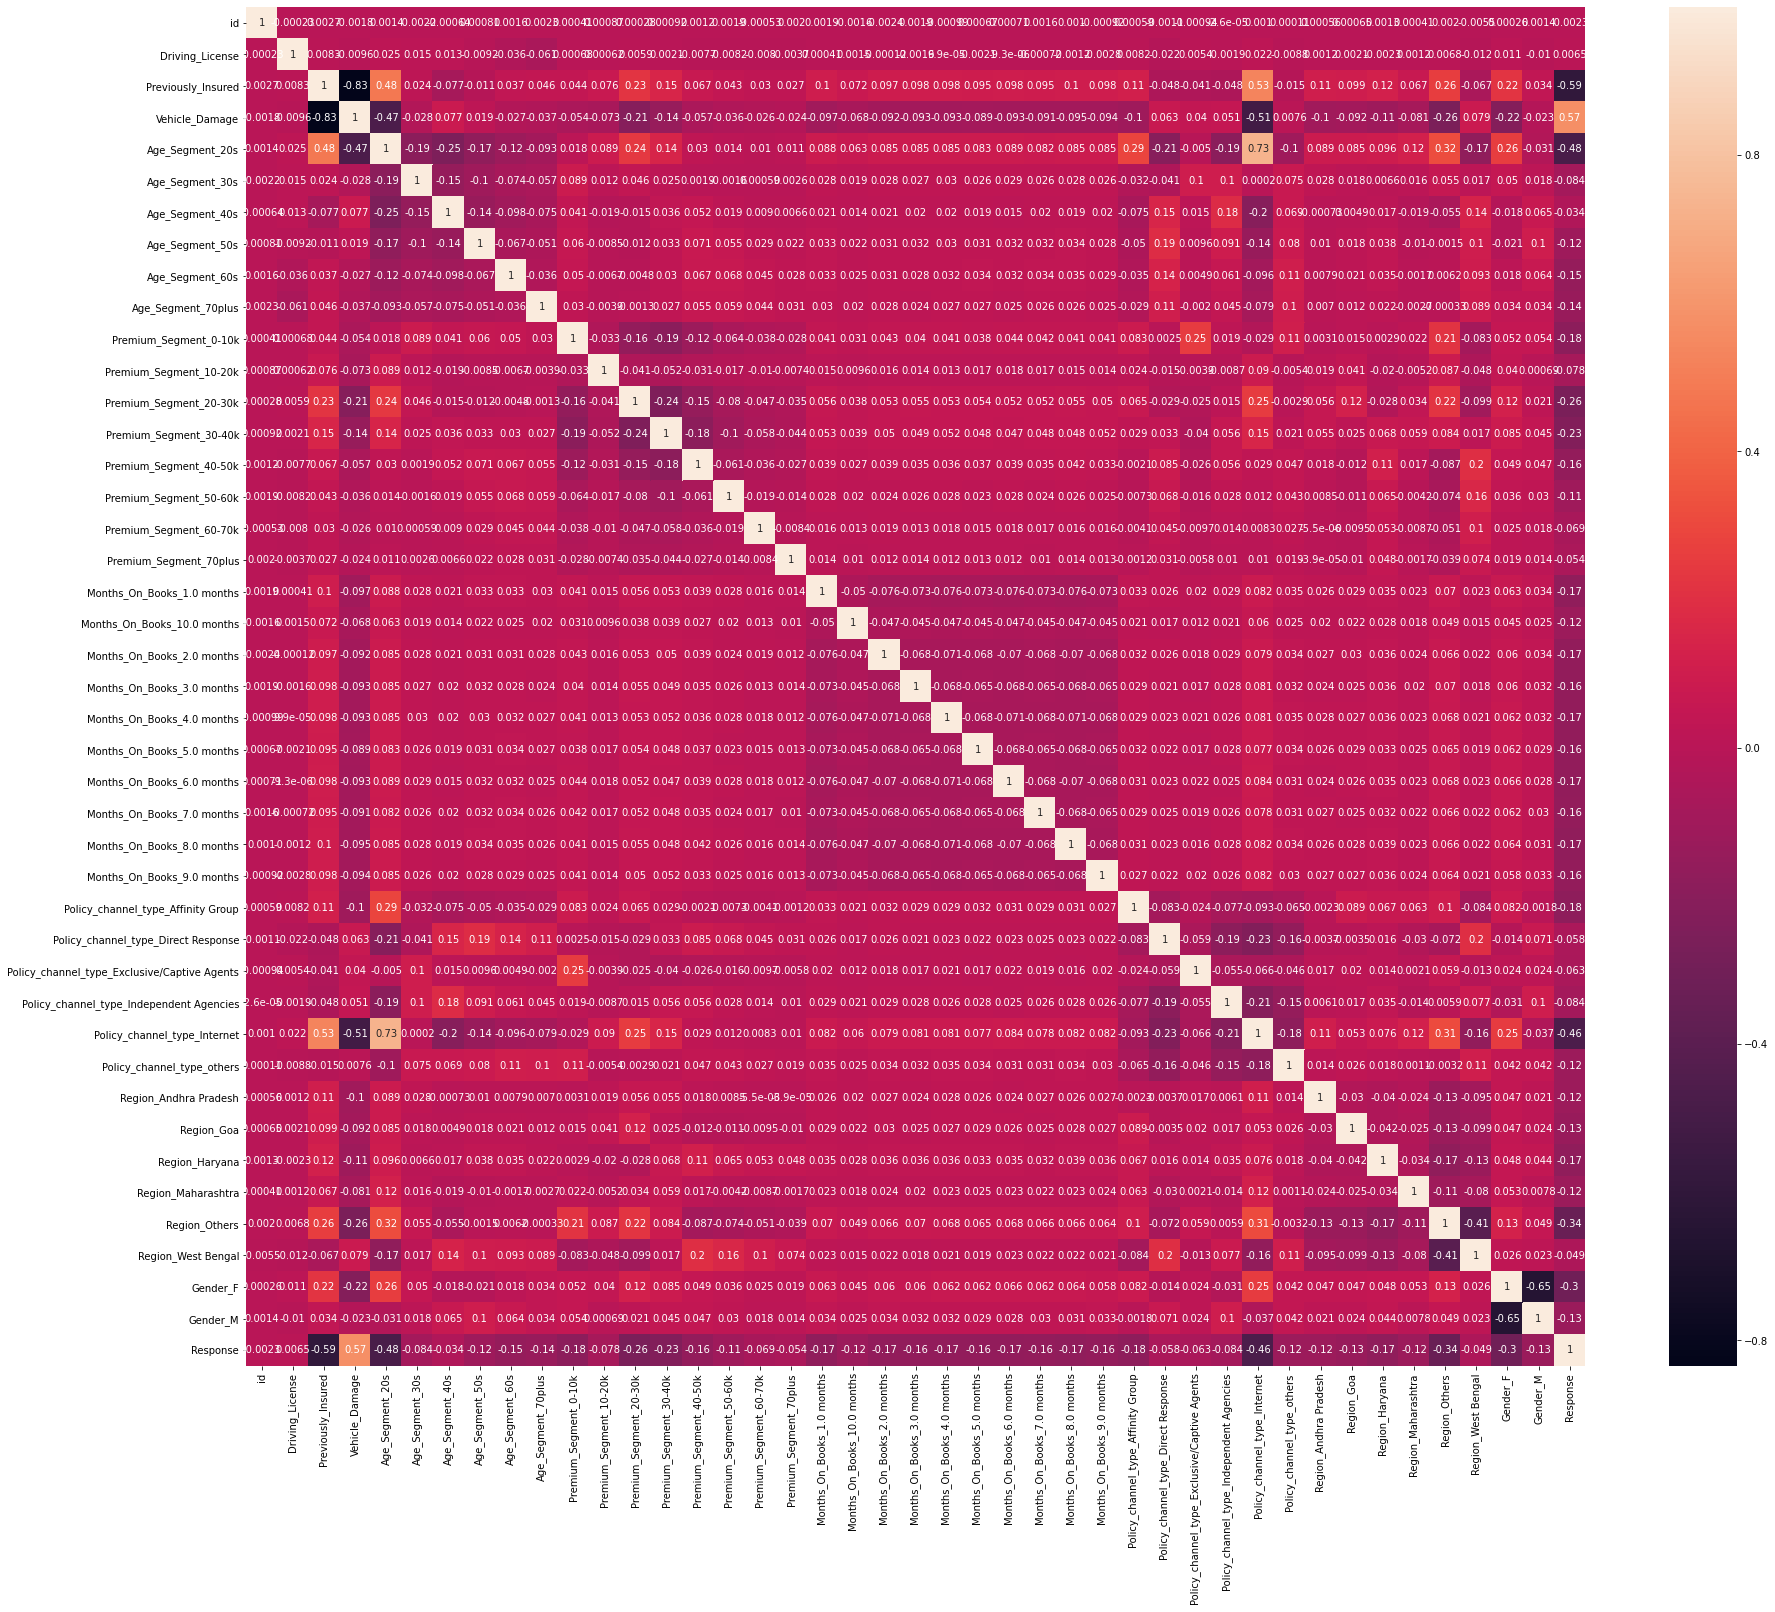

In [68]:
plt.figure(figsize = (30,25))
sns.heatmap(
    corr_data,
    annot = True)


People who have been previously insured or have claimed expenses due to vehicle damage are seen to be less likely to respond to the cross sales. 
People are also less likely to respond when contacted over internet.

As expected, the age group has a correlation with the channel through which the customers are reached.

## Exporting the balanced data

In [69]:
balanced_dataset.to_csv('balanced_insurance_dataset.csv')